In [1]:
import pdfplumber
import pandas as pd
import os
import matplotlib.pyplot as plt

def pdf2txt(pdf_file):
    text = ''
    with pdfplumber.open(pdf_file) as pdf:
        for page in pdf.pages:
            text_in_page = page.extract_text()
            if text_in_page != None:
                text = text + text_in_page
    txt_file = pdf_file[0:-4]+'.txt'
    f_txt = open(txt_file, 'w', encoding='utf-8')
    f_txt.write(text)
    f_txt.close()
    return()

def txt2ram(txt_file):
    f = open(txt_file, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    return(text)
path = "C:\\Users\\BIG BOSS\\.jupyter\\资料"
allpdf = os.listdir( path ) 
for item in allpdf:
    path = 'C:\\Users\\BIG BOSS\\.jupyter\\资料\\'+item
    print(item)
    pdf2txt(path)
path = "C:\\Users\\BIG BOSS\\.jupyter\\资料"
allpdf = os.listdir( path )    
pdf_files = []
for f in allpdf:
    if f[-4:] == '.pdf':
        pdf_files.append(f)
txt_files = []
for f in allpdf:
    if f[-4:] == '.txt':        
        txt_files.append(f)

300081：2019年年度报告.pdf
300161：2019年年度报告.pdf
300169：2019年年度报告.pdf
300174：2019年年度报告.pdf
300214：2019年年度报告.pdf
300235：2019年年度报告.pdf
300291：2019年年度报告.pdf
300316：2019年年度报告.pdf
300363：2019年年度报告.pdf
300370：2019年年度报告.pdf


In [2]:
股票简称=[]
股票代码=[]
公司的法定代表人=[]
办公地址=[]
公司网址=[]
电子信箱=[]
A=[]
B=[]
C=[]

In [10]:
for item in txt_files:
    path = 'C:\\Users\\BIG BOSS\\.jupyter\\资料\\'+item
    f = open(path, 'r', encoding='utf-8')
    text = f.read()
    index1 = text.find('一、公司信息')
    index2 = text.find('二、联系人和联系方式')
    index1a = text.find('五、主要会计数据和财务指标')
    index2a = text.find('六、分季度主要财务指标')     
    sj1 = text[index1:index2] 
    sj2 = text[index1a:index2a]
    gpjc= sj1.find('股票简称')
    gsmc = sj1.find('公司的中文名称')
    gsdb = sj1.find('公司的法定代表人')
    zcdz = sj1.find('注册地址')
    bgdz = sj1.find('办公地址')
    yzbm = sj1.find('办公地址的邮政编码')
    wz = sj1.find('公司国际互联网网址')
    lxfs = sj1.find('二、联系人和联系方式')
    sy = sj2.find('基本每股收益（元/股）') 
    xssy = sj2.find('稀释每股收益（元/股）') 
    T1 = sj1[gpjc:gsmc]+sj1[gsdb:zcdz]+sj1[bgdz:yzbm]+sj1[wz:lxfs]
    T2 = sj2[sy:xssy]
    yysr=T1+T2
    words = yysr.split(' ')
    words = [i for i in words if i != '']
        #删除空格
    股票简称.append(words[1])
    股票代码.append(words[3])
    公司的法定代表人.append(words[5])
    办公地址.append(words[7])
    公司网址.append(words[9])
    电子信箱.append(words[11])    
    A.append(words[13])


In [11]:
finalresult= pd.DataFrame({'股票简称':股票简称,
                           '股票代码':股票代码,
                           '公司的法定代表人':公司的法定代表人,
                           '办公地址':办公地址,
                           '公司国际互联网网址':公司网址,
                           '公司邮箱':电子信箱,
                           '2019年':A,
                         
                         })

In [12]:
print('finalresult:')
display(finalresult)

finalresult:


股票简称    股票代码 公司的法定代表人                                      办公地址  \
0   恒信东方  300081      孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1   华中数控  300161      陈吉红                             武汉市东湖开发区华工科技园   
2   天晟新材  300169    吴海宙\n                                    常州市龙锦路   
3   恒信东方  300081      孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
4   华中数控  300161      陈吉红                             武汉市东湖开发区华工科技园   
5   天晟新材  300169    吴海宙\n                                    常州市龙锦路   
6   恒信东方  300081      孟宪民                     北京市海淀区蓝靛厂南路牛顿办公区北区11层   
7   华中数控  300161      陈吉红                             武汉市东湖开发区华工科技园   
8   天晟新材  300169    吴海宙\n                                    常州市龙锦路   
9   元力股份  300174      许文显                           福建省南平市陈坑至瓦口工业园区   
10  日科化学  300214      彭国锋                            山东省昌乐县英轩街3999号   
11  方直科技  300235      黄元忠                     深圳市南山区大新路198号创新大厦B座9楼   
12  华录百纳  300291       方刚                         北京市朝阳区安家楼50号院A7-2   
13  晶盛机电  300316      曹建伟                      浙江省杭州市余杭区五常街道创智一号2号楼   
14  博腾股份  300363      居年丰  重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
15  安控科技  300370      许永良                           北京市海淀区地锦路9号院6号楼   

                  公司国际互联网网址                         公司邮箱               2019年  
0     http://www.hxgro.com/             office@hxgro.com              0.1068  
1       www.huazhongcnc.com               hcnc@hzncc.com              0.0887  
2                       508       http://www.tschina.com  dongmi@tschina.com  
3     http://www.hxgro.com/             office@hxgro.com              0.1068  
4       www.huazhongcnc.com               hcnc@hzncc.com              0.0887  
5                       508       http://www.tschina.com  dongmi@tschina.com  
6     http://www.hxgro.com/             office@hxgro.com              0.1068  
7       www.huazhongcnc.com               hcnc@hzncc.com              0.0887  
8                       508       http://www.tschina.com  dongmi@tschina.com  
9      www.yuanlicarbon.com          dm@yuanlicarbon.com              0.2187  
10  http://www.rikechem.com        rikechem@rikechem.com                0.42  
11       www.kingsunedu.com  kingsunsoft@kingsunsoft.com                0.19  
12      http://www.hlbn.cc/               hbndsh@hlbn.cc              0.1401  
13      http://www.jsjd.cc/                 jsjd@jsjd.cc                0.50  
14     http://www.porton.cn          porton.db@porton.cn                0.35  
15            www.etrol.com               info@etrol.com              0.0136

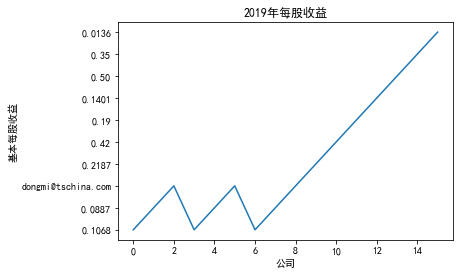

In [13]:
import matplotlib.pyplot as plt
a=[]
for item in finalresult['2019年']:
    a.append(item)
plt.rcParams['font.sans-serif']=['SimHei']
plt.plot(a)
plt.xlabel('公司')
plt.ylabel('基本每股收益')
plt.title('2019年每股收益')
plt.show()

In [ ]:
   各公司2019年每股收益波动较大